# Advance PyTorch Geometric Tutorial
## Tutorial 5
#### Antonio Longa, 10 Dec 2021

# Advance mini-batching in PyG


In [ ]:
# import libraries
import torch


from torch_geometric.datasets import TUDataset
from torch_geometric.loader import DataLoader

In [ ]:
dataset = TUDataset(root='dataset/', name='MUTAG')

Processing...
Done!


In [4]:
dataset

MUTAG(188)

In [5]:
dataset.data

/home/kklepikov/_code_/PytorchGeometricTutorial/.venv/lib/python3.12/site-packages/torch_geometric/data/in_memory_dataset.py:300: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


Data(x=[3371, 7], edge_index=[2, 7442], edge_attr=[7442, 4], y=[188])

In [6]:
dataset[0]

Data(edge_index=[2, 38], x=[17, 7], edge_attr=[38, 4], y=[1])

In [7]:
dataset[10]

Data(edge_index=[2, 38], x=[17, 7], edge_attr=[38, 4], y=[1])

# dataloader

remember that we have 188 graphs

In [ ]:
dataloader = DataLoader(dataset, batch_size=10)

In [9]:
dataloader.dataset.data

/home/kklepikov/_code_/PytorchGeometricTutorial/.venv/lib/python3.12/site-packages/torch_geometric/data/in_memory_dataset.py:300: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. The data of the dataset is already cached, so any modifications to `data` will not be reflected when accessing its elements. Clearing the cache now by removing all elements in `dataset._data_list`. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


Data(x=[3371, 7], edge_index=[2, 7442], edge_attr=[7442, 4], y=[188])

In [10]:
for data in dataloader:
    print(data)

DataBatch(edge_index=[2, 364], x=[166, 7], edge_attr=[364, 4], y=[10], batch=[166], ptr=[11])
DataBatch(edge_index=[2, 384], x=[172, 7], edge_attr=[384, 4], y=[10], batch=[172], ptr=[11])
DataBatch(edge_index=[2, 456], x=[201, 7], edge_attr=[456, 4], y=[10], batch=[201], ptr=[11])
DataBatch(edge_index=[2, 374], x=[173, 7], edge_attr=[374, 4], y=[10], batch=[173], ptr=[11])
DataBatch(edge_index=[2, 392], x=[176, 7], edge_attr=[392, 4], y=[10], batch=[176], ptr=[11])
DataBatch(edge_index=[2, 468], x=[209, 7], edge_attr=[468, 4], y=[10], batch=[209], ptr=[11])
DataBatch(edge_index=[2, 392], x=[179, 7], edge_attr=[392, 4], y=[10], batch=[179], ptr=[11])
DataBatch(edge_index=[2, 392], x=[177, 7], edge_attr=[392, 4], y=[10], batch=[177], ptr=[11])
DataBatch(edge_index=[2, 388], x=[174, 7], edge_attr=[388, 4], y=[10], batch=[174], ptr=[11])
DataBatch(edge_index=[2, 432], x=[192, 7], edge_attr=[432, 4], y=[10], batch=[192], ptr=[11])
DataBatch(edge_index=[2, 508], x=[224, 7], edge_attr=[508, 4

In [11]:
data.batch

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

In [12]:
import numpy as np

DataBatch(edge_index=[2, 7332], x=[3322, 7], edge_attr=[7332, 4], y=[185], batch=[3322], ptr=[186])
DataBatch(edge_index=[2, 110], x=[49, 7], edge_attr=[110, 4], y=[3], batch=[49], ptr=[4])


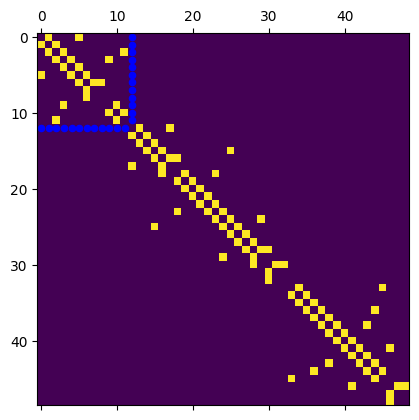

In [ ]:
dataloader = DataLoader(dataset, batch_size=185)
for data in dataloader:
    print(data)


import matplotlib.pyplot as plt
from torch_geometric.utils import to_dense_adj


adj = to_dense_adj(data.edge_index)[0]
plt.matshow(adj)
tmp = int(data.batch.unique(return_counts=True)[1][0])
plt.scatter(np.ones(tmp) * tmp, np.arange(0, tmp), s=20, color='blue')
plt.scatter(np.arange(0, tmp), np.ones(tmp) * tmp, s=20, color='blue')
plt.show()

# Bipartite Graphs

Create a simple bypartite graphs

In [ ]:
import networkx as nx

b1 = nx.algorithms.bipartite.generators.random_graph(2, 3, 0.6, seed=10)
b2 = nx.algorithms.bipartite.generators.random_graph(2, 3, 0.6, seed=7)

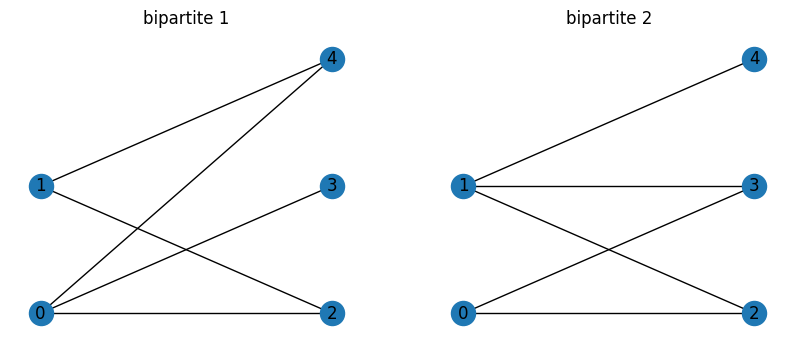

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title('bipartite 1')
X, Y = nx.algorithms.bipartite.sets(b1)
pos = dict()
pos.update((n, (1, i)) for i, n in enumerate(X))   # put nodes from X at x=1
pos.update((n, (2, i)) for i, n in enumerate(Y))   # put nodes from Y at x=2
nx.draw(b1, pos=pos, with_labels=True)

plt.subplot(1, 2, 2)
plt.title('bipartite 2')
X, Y = nx.algorithms.bipartite.sets(b2)
pos = dict()
pos.update((n, (1, i)) for i, n in enumerate(X))   # put nodes from X at x=1
pos.update((n, (2, i)) for i, n in enumerate(Y))   # put nodes from Y at x=2
nx.draw(b2, pos=pos, with_labels=True)
plt.show()

In [16]:
b1.nodes(data=True)

NodeDataView({0: {'bipartite': 0}, 1: {'bipartite': 0}, 2: {'bipartite': 1}, 3: {'bipartite': 1}, 4: {'bipartite': 1}})

In [18]:
print(nx.adjacency_matrix(b1).toarray().shape)
print(nx.adjacency_matrix(b1).toarray())

(5, 5)
[[0 0 1 1 1]
 [0 0 1 0 1]
 [1 1 0 0 0]
 [1 0 0 0 0]
 [1 1 0 0 0]]


In [19]:
b1.edges()

EdgeView([(0, 2), (0, 3), (0, 4), (1, 2), (1, 4)])

In [ ]:
edge_list_b1 = np.array(list(nx.edges(b1)))
edge_list_b1 = np.array(
    [[a, b - (1 + np.max(edge_list_b1[:, 0]))] for a, b in edge_list_b1]
)
edge_list_b1 = edge_list_b1.T

edge_list_b1

array([[0, 0, 0, 1, 1],
       [0, 1, 2, 0, 2]])

In [ ]:
edge_list_b2 = np.array(list(nx.edges(b2)))
edge_list_b2 = np.array(
    [[a, b - (1 + np.max(edge_list_b2[:, 0]))] for a, b in edge_list_b2]
)
edge_list_b2 = edge_list_b2.T

edge_list_b2

array([[0, 0, 1, 1, 1],
       [0, 1, 0, 1, 2]])

In [ ]:
from torch_geometric.data import Data


class BipartiteData(Data):
    def __init__(self, edge_index=None, x_s=None, x_t=None):
        super().__init__()
        self.edge_index = edge_index
        self.x_s = x_s
        self.x_t = x_t

    def __inc__(self, key, value, *args, **kwargs):
        if key == 'edge_index':
            return torch.tensor([[self.x_s.size(0)], [self.x_t.size(0)]])
        else:
            return super().__inc__(key, value, *args, **kwargs)

In [ ]:
from torch_geometric.loader import DataLoader

edge_index_b1 = torch.tensor([edge_list_b1])
x_s = torch.randn(2, 16)  # 2 nodes.
x_t = torch.randn(3, 16)  # 3 nodes.
data_graph1 = BipartiteData(edge_index_b1, x_s, x_t)
data_graph1.num_nodes = 5


edge_index_b2 = torch.tensor([edge_list_b2])
x_s = torch.randn(2, 16)  # 2 nodes.
x_t = torch.randn(3, 16)  # 3 nodes.
data_graph2 = BipartiteData(edge_index_b2, x_s, x_t)
data_graph2.num_nodes = 5

/tmp/ipykernel_215152/2225336692.py:3: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:274.)
  edge_index_b1 = torch.tensor([edge_list_b1])


In [24]:
data_list = [data_graph1, data_graph2]
loader = DataLoader(data_list, batch_size=2)
batch = next(iter(loader))

print(batch)

print(batch.edge_index)

BipartiteDataBatch(edge_index=[1, 2, 10], x_s=[4, 16], x_t=[6, 16], num_nodes=10, batch=[10], ptr=[3])
tensor([[[0, 0, 0, 1, 1, 2, 2, 3, 3, 3],
         [0, 1, 2, 0, 2, 3, 4, 3, 4, 5]]])
